# **FINAL PROJECT**

# ***Victor H Torres.***
# ***DATA 602***

##### *****For the final project, I decided to use a public dataset from the NYC open data website, the name of the dataset is “courses/training providing listing”, and is about the list of courses, training for individuals, as well as to grants offered by the City of New York.*****
##### *****•	Research Question: What courses on IT related field are offered by the City of New York? costs and if there are grants available, the requirements for it.*****
##### *****•	Justification: This data analysis is relevant to my industry, since I live in New York, and I did not know that the city offers a vast amount of help and resources to train their citizens, and I would like to know the requirements to join these courses, also, it would be great to find out if I can pass this information to friends and family that it might be interested in these programs.*****


In [1]:
# Load Libraries required for this project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset "Courses training Provider listing" from the NYC open data website, and convert it into a dataframe
nyc_train = pd.read_csv("C:/Users/vitug/OneDrive/Desktop/DATA_602/Courses_Training_Provider_Listing_20240416.csv")
nyc_df=pd.DataFrame(nyc_train)
print(nyc_df)

                                   Organization Name  \
0    International Development Institute (Manhattan)   
1                                  COMPU21 INSTITUTE   
2                      College of Staten Island CUNY   
3                                      Noble Desktop   
4                      College of Staten Island CUNY   
..                                               ...   
540                       Huaqiao Yihu Institute Inc   
541                   Sunny Truck Driving School INC   
542   International Development Institute (Brooklyn)   
543                          Edcuational Enhancement   
544                       QUEENS TRUCKING SCHOOL INC   

                            Address1           City     State  Zip Code  \
0             161 William St 14th Fl       New York  New York   10038.0   
1              3907 PRINCE ST STE 2C       FLUSHING  New York   11354.0   
2          2800 VICTORY BLVD BLDG 2A  STATEN ISLAND  New York   10314.0   
3               185 MADISON

**Data Wrangling** 

**Delete Columns, rename some of the columns**

Find mean, median and quantile values of coluns, replace NA values on it

In [3]:
# First I'm getting the column names using column.values function.
column_name = list(nyc_df.columns.values)
print("Column Names :", column_name) 

Column Names : ['Organization Name', 'Address1', 'City', 'State', 'Zip Code', 'Borough', 'Neighborhood', 'Phone1', 'Fax', 'Website', 'Job Placement Services', 'Financial Aid Services', 'Contact FirstName', 'Contact LastName', 'course name', 'CourseDescription', 'Keywords', 'Cost Total', 'Cost Includes', 'Cost Does Not Include', 'Duration', 'Duration Unit', 'NumHours', 'Prerequisites', 'Max Class Size', 'Years Course Offered', 'Instructor Credentials', 'Delivery Method', 'Schedule', 'Is HRA', 'Is SBS']


In [4]:
# Rename columns using .rename function and displaying first 5 rows results using .head function.
nyc_df.rename(columns = {'Organization Name':'Name', 'Job Placement Services':'JPS', 'Financial Aid Services':'FAS', 'CourseDescription':'Description'}, inplace = True)
nyc_df.head()

,Name,Address1,City,State,Zip Code,Borough,Neighborhood,Phone1,Fax,Website,...,Duration Unit,NumHours,Prerequisites,Max Class Size,Years Course Offered,Instructor Credentials,Delivery Method,Schedule,Is HRA,Is SBS
0,International Development Institute (Manhattan),161 William St 14th Fl,New York,New York,10038.0,Manhattan,Lower Manhattan,2125941917,212.0,NaN,...,Hour(s),40,<p>High School Diploma GED or Entrance Test<...,NaN,NaN,NaN,Classroom Training,Check with school to receive most updated sche...,Yes,No
1,COMPU21 INSTITUTE,3907 PRINCE ST STE 2C,FLUSHING,New York,11354.0,Queens,Flushing - Clearview,7187621900,NaN,http://www.compu21.com,...,Hour(s),120,<p>3 months working experience with Windows or...,20.0,NaN,NaN,Classroom Training,Check with school to receive most updated sche...,No,Yes. ITG vouchers issued for this course will ...
2,College of Staten Island CUNY,2800 VICTORY BLVD BLDG 2A,STATEN ISLAND,New York,10314.0,Staten Island,Willowbrook,7189822182,NaN,http://www.csi.cuny.edu/continue,...,Hour(s),40,There are no prerequisites to take this course.,NaN,NaN,NaN,Web-Based,Check with school to receive most updated sche...,Yes,No
3,Noble Desktop,185 MADISON AVE FL 3,NEW YORK,New York,10016.0,Manhattan,Gramercy Park - Murray Hill,2122264149,NaN,http://www.nobledesktop.com,...,Hour(s),60,Must have basic computer skills such as mouse...,NaN,NaN,NaN,Classroom Training,Check with school to receive most updated sche...,No,No
4,College of Staten Island CUNY,2800 VICTORY BLVD BLDG 2A,STATEN ISLAND,New York,10314.0,Staten Island,Willowbrook,7189822182,NaN,http://www.csi.cuny.edu/continue,...,Hour(s),100,The Certified Ethical Hacker course is specifi...,NaN,NaN,NaN,Web-Based,Check with school to receive most updated sche...,No,No


In [5]:
# Calculate the mean of "numhours" column
nyc_df["NumHours"].mean()


213.50642201834862

In [7]:
#Calculate the median of the 'Cost Total' column.
nyc_df["Cost Total"].median()

2500.0

In [8]:
#Calculate the quantile of the 'Duration' column.
nyc_df['Duration'].quantile()

110.0

In [9]:
#Print data types of columns tp define which column I am choosing to keep.
print(( nyc_df.dtypes))

Name                       object
Address1                   object
City                       object
State                      object
Zip Code                  float64
Borough                    object
Neighborhood               object
Phone1                      int64
Fax                       float64
Website                    object
JPS                       float64
FAS                        object
Contact FirstName          object
Contact LastName           object
course name                object
Description                object
Keywords                   object
Cost Total                float64
Cost Includes              object
Cost Does Not Include     float64
Duration                    int64
Duration Unit              object
NumHours                    int64
Prerequisites              object
Max Class Size            float64
Years Course Offered      float64
Instructor Credentials     object
Delivery Method            object
Schedule                   object
Is HRA        

In [10]:
#Replace NA values with zeros using the fillna function.
nyc_df.fillna(0) 
nyc_df.head()


,Name,Address1,City,State,Zip Code,Borough,Neighborhood,Phone1,Fax,Website,...,Duration Unit,NumHours,Prerequisites,Max Class Size,Years Course Offered,Instructor Credentials,Delivery Method,Schedule,Is HRA,Is SBS
0,International Development Institute (Manhattan),161 William St 14th Fl,New York,New York,10038.0,Manhattan,Lower Manhattan,2125941917,212.0,NaN,...,Hour(s),40,<p>High School Diploma GED or Entrance Test<...,NaN,NaN,NaN,Classroom Training,Check with school to receive most updated sche...,Yes,No
1,COMPU21 INSTITUTE,3907 PRINCE ST STE 2C,FLUSHING,New York,11354.0,Queens,Flushing - Clearview,7187621900,NaN,http://www.compu21.com,...,Hour(s),120,<p>3 months working experience with Windows or...,20.0,NaN,NaN,Classroom Training,Check with school to receive most updated sche...,No,Yes. ITG vouchers issued for this course will ...
2,College of Staten Island CUNY,2800 VICTORY BLVD BLDG 2A,STATEN ISLAND,New York,10314.0,Staten Island,Willowbrook,7189822182,NaN,http://www.csi.cuny.edu/continue,...,Hour(s),40,There are no prerequisites to take this course.,NaN,NaN,NaN,Web-Based,Check with school to receive most updated sche...,Yes,No
3,Noble Desktop,185 MADISON AVE FL 3,NEW YORK,New York,10016.0,Manhattan,Gramercy Park - Murray Hill,2122264149,NaN,http://www.nobledesktop.com,...,Hour(s),60,Must have basic computer skills such as mouse...,NaN,NaN,NaN,Classroom Training,Check with school to receive most updated sche...,No,No
4,College of Staten Island CUNY,2800 VICTORY BLVD BLDG 2A,STATEN ISLAND,New York,10314.0,Staten Island,Willowbrook,7189822182,NaN,http://www.csi.cuny.edu/continue,...,Hour(s),100,The Certified Ethical Hacker course is specifi...,NaN,NaN,NaN,Web-Based,Check with school to receive most updated sche...,No,No


In [11]:
#Subset the data set, I'm going to work with the most relevant columns to make the analysis.
nyc_subset =  nyc_df[["Name","City","FAS","course name", "Description","Keywords", "Cost Total", "Cost Includes", "Max Class Size","Duration", "NumHours", "Prerequisites"]]
nyc_subset.head()

,Name,City,FAS,course name,Description,Keywords,Cost Total,Cost Includes,Max Class Size,Duration,NumHours,Prerequisites
0,International Development Institute (Manhattan),New York,Some types of Financial Aid are provided.,Electrocardiograph Technician,This course prepares the students with basic p...,NaN,1500.0,Classroom Hours 20.0 Lab Hours 0.0 Interns...,NaN,40,40,<p>High School Diploma GED or Entrance Test<...
1,COMPU21 INSTITUTE,FLUSHING,Some types of Financial Aid are provided.,Desktop Support Technician,Desktop Support Technician combines 3 topics: ...,network help desk helpdesk administrator ...,3711.0,Classroom Hours 50.0 Lab Hours 70.0 Intern...,20.0,120,120,<p>3 months working experience with Windows or...
2,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,Certified Professional Life Coach (Exam cost i...,The Certified Professional Life Coach course t...,NaN,1825.0,Classroom Hours 40.0 Lab Hours 0.0 Interns...,NaN,40,40,There are no prerequisites to take this course.
3,Noble Desktop,NEW YORK,Some types of Financial Aid are provided.,Program in Digital Marketing,Learn essential digital marketing skills neede...,NaN,2750.0,Classroom Hours 60.0 Lab Hours 0.0 Interns...,NaN,60,60,Must have basic computer skills such as mouse...
4,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,Certified Ethical Hacker (Voucher Included),This course will immerse you into the hacker m...,NaN,2895.0,Classroom Hours 100.0 Lab Hours 0.0 Intern...,NaN,100,100,The Certified Ethical Hacker course is specifi...


In [13]:
#Create a new column using to display the median of 'Duration' and 'NumHours' columns
nyc_subset['Median'] = nyc_subset[["Duration", "NumHours"]].median(axis=1)
nyc_subset.head()


C:\Users\vitug\AppData\Local\Temp/ipykernel_18888/3557670758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_subset['Median'] = nyc_subset[["Duration", "NumHours"]].median(axis=1)


,Name,City,FAS,course name,Description,Keywords,Cost Total,Cost Includes,Max Class Size,Duration,NumHours,Prerequisites,Median
0,International Development Institute (Manhattan),New York,Some types of Financial Aid are provided.,Electrocardiograph Technician,This course prepares the students with basic p...,NaN,1500.0,Classroom Hours 20.0 Lab Hours 0.0 Interns...,NaN,40,40,<p>High School Diploma GED or Entrance Test<...,40.0
1,COMPU21 INSTITUTE,FLUSHING,Some types of Financial Aid are provided.,Desktop Support Technician,Desktop Support Technician combines 3 topics: ...,network help desk helpdesk administrator ...,3711.0,Classroom Hours 50.0 Lab Hours 70.0 Intern...,20.0,120,120,<p>3 months working experience with Windows or...,120.0
2,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,Certified Professional Life Coach (Exam cost i...,The Certified Professional Life Coach course t...,NaN,1825.0,Classroom Hours 40.0 Lab Hours 0.0 Interns...,NaN,40,40,There are no prerequisites to take this course.,40.0
3,Noble Desktop,NEW YORK,Some types of Financial Aid are provided.,Program in Digital Marketing,Learn essential digital marketing skills neede...,NaN,2750.0,Classroom Hours 60.0 Lab Hours 0.0 Interns...,NaN,60,60,Must have basic computer skills such as mouse...,60.0
4,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,Certified Ethical Hacker (Voucher Included),This course will immerse you into the hacker m...,NaN,2895.0,Classroom Hours 100.0 Lab Hours 0.0 Intern...,NaN,100,100,The Certified Ethical Hacker course is specifi...,100.0


In [14]:
# Remove "Keywords" column from dataframe.
nyc_subset.pop("Keywords")
nyc_subset

,Name,City,FAS,course name,Description,Cost Total,Cost Includes,Max Class Size,Duration,NumHours,Prerequisites,Median
0,International Development Institute (Manhattan),New York,Some types of Financial Aid are provided.,Electrocardiograph Technician,This course prepares the students with basic p...,1500.0,Classroom Hours 20.0 Lab Hours 0.0 Interns...,NaN,40,40,<p>High School Diploma GED or Entrance Test<...,40.0
1,COMPU21 INSTITUTE,FLUSHING,Some types of Financial Aid are provided.,Desktop Support Technician,Desktop Support Technician combines 3 topics: ...,3711.0,Classroom Hours 50.0 Lab Hours 70.0 Intern...,20.0,120,120,<p>3 months working experience with Windows or...,120.0
2,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,Certified Professional Life Coach (Exam cost i...,The Certified Professional Life Coach course t...,1825.0,Classroom Hours 40.0 Lab Hours 0.0 Interns...,NaN,40,40,There are no prerequisites to take this course.,40.0
3,Noble Desktop,NEW YORK,Some types of Financial Aid are provided.,Program in Digital Marketing,Learn essential digital marketing skills neede...,2750.0,Classroom Hours 60.0 Lab Hours 0.0 Interns...,NaN,60,60,Must have basic computer skills such as mouse...,60.0
4,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,Certified Ethical Hacker (Voucher Included),This course will immerse you into the hacker m...,2895.0,Classroom Hours 100.0 Lab Hours 0.0 Intern...,NaN,100,100,The Certified Ethical Hacker course is specifi...,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,Huaqiao Yihu Institute Inc,FLUSHING,Some types of Financial Aid are provided.,Nurse Aide Advanced,This course prepares studentsCNA Phlebotomy a...,3310.0,Classroom Hours 195.0 Lab Hours 30.0 Inter...,NaN,255,255,NaN,255.0
541,Sunny Truck Driving School INC,Flushing,Some types of Financial Aid are provided.,CDL Class A Training Program,36 Hour Class A Tractor TrailerProgram. Classr...,4840.0,Classroom Hours 12.0 Lab Hours 0.0 Interns...,NaN,36,36,<p>NYS driver license.&nbsp;</p> . .<p>CDL Per...,36.0
542,International Development Institute (Brooklyn),BROOKLYN,Some types of Financial Aid are provided.,Home Health Aide - American Sign Language (ASL),Become certified by the state of New York as a...,4000.0,Classroom Hours 62.0 Lab Hours 0.0 Interns...,12.0,120,120,NaN,120.0
543,Edcuational Enhancement,Staten Island,Some types of Financial Aid are provided.,350 Hours of Education and Training for CASAC,The 350 hours of Education and Training is req...,4345.0,Classroom Hours 350.0 Lab Hours 0.0 Intern...,25.0,350,350,NaN,350.0


In [23]:
#Capitalize "course name" column using str.upper function.
nyc_subset['course name'].str.upper() 
nyc_subset

,Name,City,FAS,course name,Description,Cost Total,Cost Includes,Max Class Size,Duration,NumHours,Prerequisites,Median
0,International Development Institute (Manhattan),New York,Some types of Financial Aid are provided.,Electrocardiograph Technician,This course prepares the students with basic p...,1500.0,Classroom Hours 20.0 Lab Hours 0.0 Interns...,NaN,40,40,<p>High School Diploma GED or Entrance Test<...,40.0
1,COMPU21 INSTITUTE,FLUSHING,Some types of Financial Aid are provided.,Desktop Support Technician,Desktop Support Technician combines 3 topics: ...,3711.0,Classroom Hours 50.0 Lab Hours 70.0 Intern...,20.0,120,120,<p>3 months working experience with Windows or...,120.0
2,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,Certified Professional Life Coach (Exam cost i...,The Certified Professional Life Coach course t...,1825.0,Classroom Hours 40.0 Lab Hours 0.0 Interns...,NaN,40,40,There are no prerequisites to take this course.,40.0
3,Noble Desktop,NEW YORK,Some types of Financial Aid are provided.,Program in Digital Marketing,Learn essential digital marketing skills neede...,2750.0,Classroom Hours 60.0 Lab Hours 0.0 Interns...,NaN,60,60,Must have basic computer skills such as mouse...,60.0
4,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,Certified Ethical Hacker (Voucher Included),This course will immerse you into the hacker m...,2895.0,Classroom Hours 100.0 Lab Hours 0.0 Intern...,NaN,100,100,The Certified Ethical Hacker course is specifi...,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,Huaqiao Yihu Institute Inc,FLUSHING,Some types of Financial Aid are provided.,Nurse Aide Advanced,This course prepares studentsCNA Phlebotomy a...,3310.0,Classroom Hours 195.0 Lab Hours 30.0 Inter...,NaN,255,255,NaN,255.0
541,Sunny Truck Driving School INC,Flushing,Some types of Financial Aid are provided.,CDL Class A Training Program,36 Hour Class A Tractor TrailerProgram. Classr...,4840.0,Classroom Hours 12.0 Lab Hours 0.0 Interns...,NaN,36,36,<p>NYS driver license.&nbsp;</p> . .<p>CDL Per...,36.0
542,International Development Institute (Brooklyn),BROOKLYN,Some types of Financial Aid are provided.,Home Health Aide - American Sign Language (ASL),Become certified by the state of New York as a...,4000.0,Classroom Hours 62.0 Lab Hours 0.0 Interns...,12.0,120,120,NaN,120.0
543,Edcuational Enhancement,Staten Island,Some types of Financial Aid are provided.,350 Hours of Education and Training for CASAC,The 350 hours of Education and Training is req...,4345.0,Classroom Hours 350.0 Lab Hours 0.0 Intern...,25.0,350,350,NaN,350.0


In [24]:
#Check values in "Cost Total" column using the dtype.kind function.
nyc_subset['Cost Total'].dtype.kind in 'iufc'

True

In [25]:
#Get the mean, min, and max by grouping 'Course Name with Cost Total column.
nyc_subset1 = nyc_subset.groupby('course name').agg({'Cost Total': ['mean', 'min', 'max']})
nyc_subset1

Cost Total                
                                                         mean     min     max
course name                                                                  
16 Hour On The Job Training Course for Security...      170.0   170.0   170.0
16 Hour On-The Job Training Course for Security...      700.0   700.0   700.0
16 Hour On-the-Job Training for Security Guards         150.0   150.0   150.0
2 Hour Drug & Alcohol Awareness (SST)                    95.0    95.0    95.0
30 Hour OSHA construction Safety and Health             385.0   385.0   385.0
...                                                       ...     ...     ...
Victim Advocacy Certificate Course                      995.0   995.0   995.0
Web Design                                             1300.0  1300.0  1300.0
Welding                                                3800.0  3800.0  3800.0
Windows Server and Cisco Network Administrator         3900.0  3900.0  3900.0
WordPress: Build Custom Themes                          650.0   650.0   650.0

[488 rows x 3 columns]

In [26]:
# print "Course Name" column to find IT jobs on it
print(nyc_subset[['course name']].to_string(index=False))

                                                                                         course name
                                                                       Electrocardiograph Technician
                                                                          Desktop Support Technician
                                              Certified Professional Life Coach (Exam cost included)
                                                                        Program in Digital Marketing
                                                         Certified Ethical Hacker (Voucher Included)
                                                                           Medical Coding Specialist
                                    Professional Bookkeeping with QuickBooks 2015  Software Included
                                                             ELTD - Commercial Bus / Truck  Training
                                                    Grow Your Own Teacher Assistant Trainin

In [27]:
# Create a dataframe with IT jobs only, this will answer my research question: "What courses on IT related field are offered by the City of New York? costs and if there are grants available, the requirements for it."
it_jobs = ['Computer Technician A+', 'Database Administration and Development', 'CompTIA Certification Pro', 'CompTIA Certification Pro', 'Data Analytics Certificate', 'Computer Systems Analyst', 'CompTIA Certification Training A+  Network+  Security+', 'Computer Support Specialists: A+ Certification', 'Network +','Computer Technician','Computerized Support Office Specialists','Data Analytics Technologies Bootcamp','Data Science','Advanced Web Database','Data Analytics (Full-Time)','Advanced Web Design','Data Analyst Core Course (Online)','Program in UX & UI Design','MS SQL DBA','Big Data Engineer Program','Software Quality Analyst II','Administration SQL Server','Web Design','Computer Systems Analyst (Online)','Software Engineering Immersive (Part-Time)','Back End Software Developer Program','Front End Software Developer Program','Advanced Web  Graphic Design Package','Data Analytics (Part-Time)','Network+','Network Administrator Package','Data Analyst Course (Online)',' Java Programmer package','Data analyst','Advanced Web  Graphic Design Application  Package',' Python for Data Science','Graphic and Web Designer  (TAA ONLY)','Graphic Design',''] 
   
# selecting rows based on condition 
nyc_subset2= nyc_subset[nyc_subset['course name'].isin(it_jobs)] 
   
nyc_subset2

,Name,City,FAS,course name,Description,Cost Total,Cost Includes,Max Class Size,Duration,NumHours,Prerequisites,Median
11,Kingsborough Community College/ Office of Cont...,BROOKLYN,Some types of Financial Aid are provided.,Computer Technician A+,CareerStep's Computer Technician program will ...,2499.0,Classroom Hours 134.0 Lab Hours 0.0 Intern...,NaN,134,134,NaN,134.0
15,New Technologies Information Institute,NEW YORK,Some types of Financial Aid are provided.,Database Administration and Development,Develops in-depth understanding of database co...,2200.0,Classroom Hours 96.0 Lab Hours 0.0 Interns...,NaN,96,96,<p>N/A</p> .,96.0
22,Kingsborough Community College/ Office of Cont...,BROOKLYN,Some types of Financial Aid are provided.,CompTIA Certification Pro,Prepare to earn IT certifications that can lea...,3999.0,Classroom Hours 290.0 Lab Hours 0.0 Intern...,NaN,290,290,NaN,290.0
23,Noble Desktop,NEW YORK,Some types of Financial Aid are provided.,Data Analytics Certificate,Why Data Analysts Are Needed in Today's Workfo...,4995.0,Classroom Hours 114.0 Lab Hours 0.0 Intern...,NaN,114,114,NaN,114.0
45,SAM Consulting Services Inc. (Brooklyn),Brooklyn,Some types of Financial Aid are provided.,Computer Systems Analyst,Through a combination of lectures and exercise...,5000.0,Classroom Hours 186.0 Lab Hours 98.0 Inter...,NaN,284,284,<p>Six months of industry experience OR Associ...,284.0
55,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,CompTIA Certification Training A+ Network+ S...,This program will prepare you for CompTIA A+ ...,4030.0,Classroom Hours 480.0 Lab Hours 0.0 Intern...,NaN,480,480,To enroll in this program you should have bas...,480.0
81,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,Computer Support Specialists: A+ Certification,Build your own personal computer as well as le...,2025.0,Classroom Hours 45.0 Lab Hours 45.0 Intern...,10.0,120,120,Basic pc skills,120.0
117,COMPU21 INSTITUTE,FLUSHING,Some types of Financial Aid are provided.,Network +,This course will teach students to learn netwo...,1490.0,Classroom Hours 20.0 Lab Hours 20.0 Intern...,NaN,40,40,A+ Technician,40.0
119,COMPU21 INSTITUTE,FLUSHING,Some types of Financial Aid are provided.,Computer Technician,This course package includes 3 courses: A+ Tec...,3727.0,Classroom Hours 78.0 Lab Hours 42.0 Intern...,NaN,120,120,High School Diploma & Basic Windows skills and...,120.0
126,New Technologies Information Institute,NEW YORK,Some types of Financial Aid are provided.,Computerized Support Office Specialists,In Introduction to computerized office skills ...,2525.0,Classroom Hours 192.0 Lab Hours 0.0 Intern...,14.0,192,192,NaN,192.0


**Data Analysis**

* I am going to use Seaborn and Mathplotlib to visualize my analysis of the dataframe



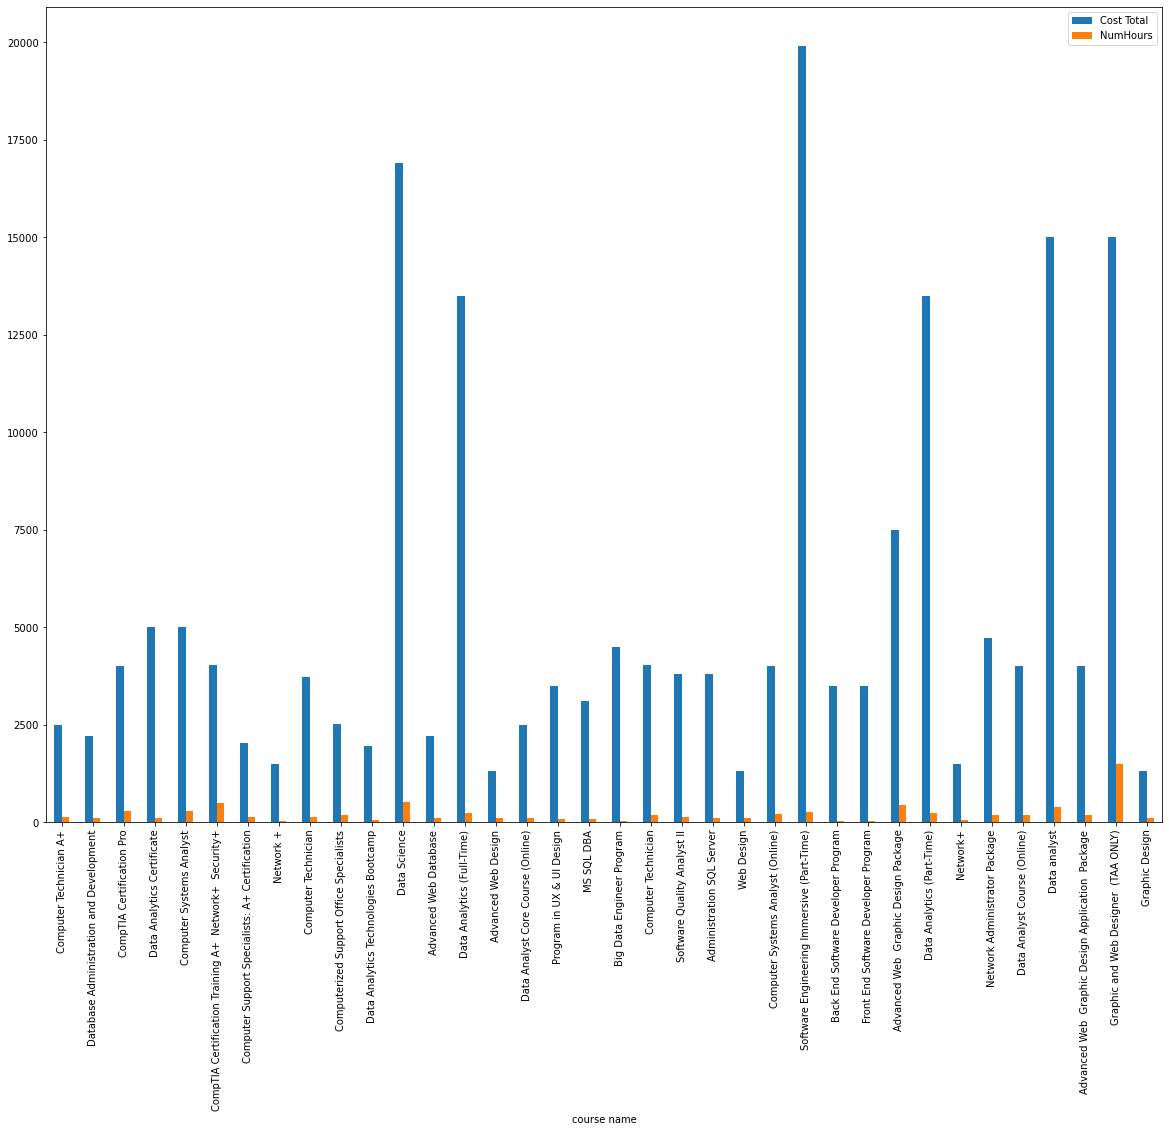

In [28]:
# Check the total cost and number of hours for each IT program
nyc_subset2.plot(x="course name", y=["Cost Total", "NumHours"],
kind="bar", figsize=(20, 15))
 
plt.show()

<AxesSubplot:xlabel='course name', ylabel='Duration'>

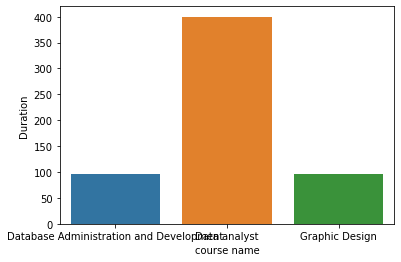

In [29]:

# Create a plot by subsetting 'course name and get the total duration of specific courses.
nyc_plot1 = nyc_subset2[nyc_subset2['course name'].isin(['Database Administration and Development', 'Graphic Design', 'Data analyst'])]
sns.barplot(x='course name', y='Duration', data=nyc_plot1)




<AxesSubplot:xlabel='Cost Total', ylabel='Duration'>

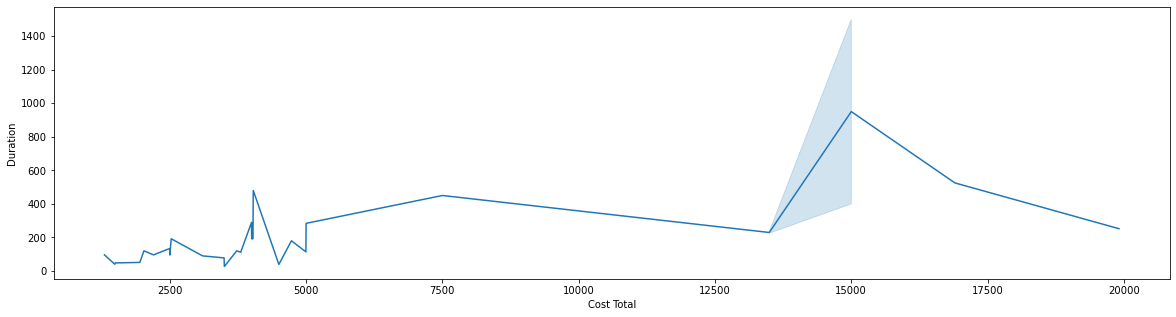

In [30]:
#Line plot of total cost and duration of all courses
plot2 = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Cost Total', y='Duration', data=nyc_subset2)

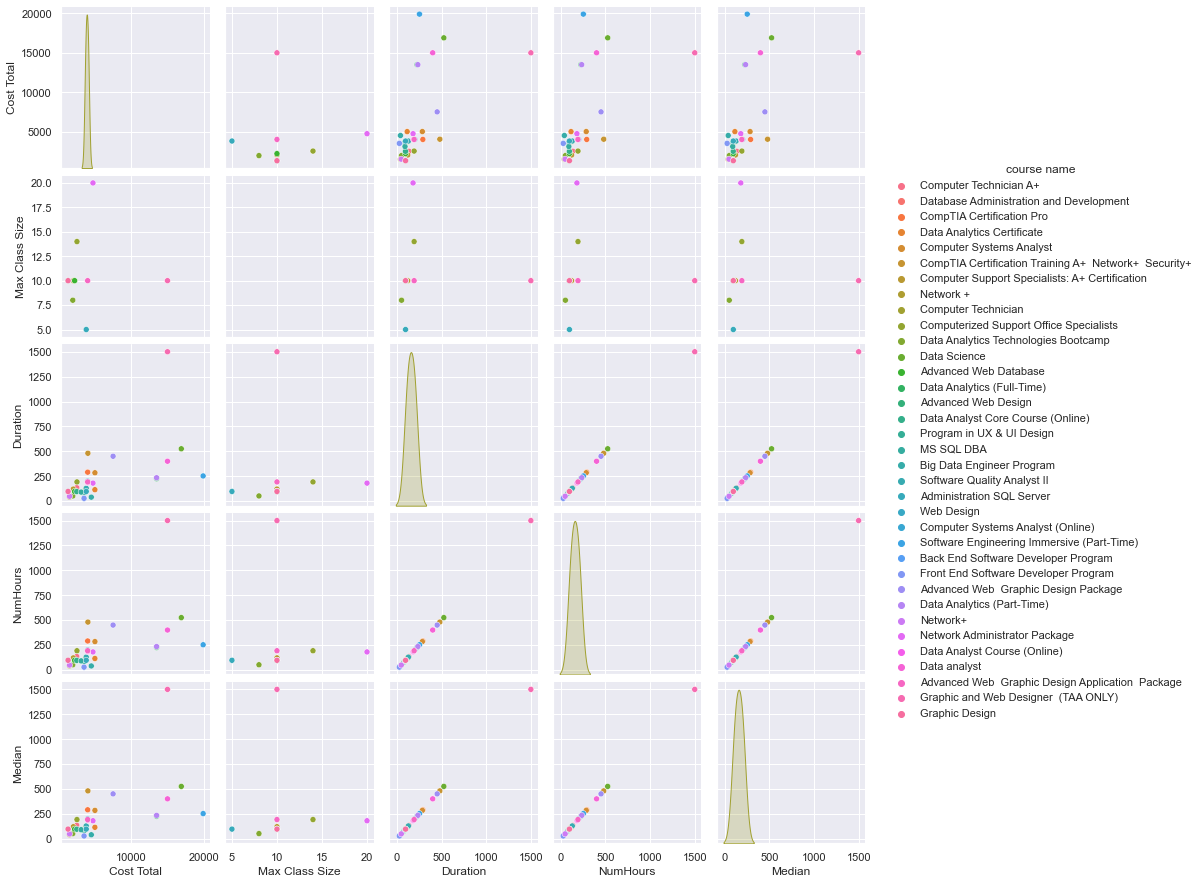

In [31]:
# graph displaying the variables by each course
%matplotlib inline
sns.set()
sns.pairplot(nyc_subset2, hue='course name');

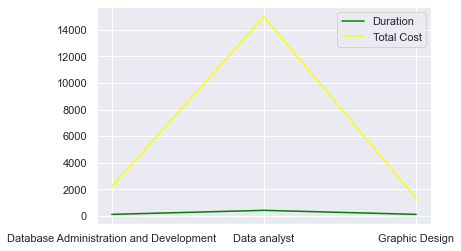

In [32]:
# Line plot displaying duration and cost total
plt.plot(nyc_plot1['course name'], nyc_plot1['Duration'], label = 'Duration', color = 'green')
plt.plot(nyc_plot1['course name'], nyc_plot1['Cost Total'], label = 'Total Cost', color = 'yellow')
plt.legend()
plt.show()



In [43]:
# sort values in ascending order to get values
nyc_subset2.sort_values(["Cost Total", "Duration"], ascending=[True, False])
nyc_subset2

,Name,City,FAS,course name,Description,Cost Total,Cost Includes,Max Class Size,Duration,NumHours,Prerequisites,Median
11,Kingsborough Community College/ Office of Cont...,BROOKLYN,Some types of Financial Aid are provided.,Computer Technician A+,CareerStep's Computer Technician program will ...,2499.0,Classroom Hours 134.0 Lab Hours 0.0 Intern...,NaN,134,134,NaN,134.0
15,New Technologies Information Institute,NEW YORK,Some types of Financial Aid are provided.,Database Administration and Development,Develops in-depth understanding of database co...,2200.0,Classroom Hours 96.0 Lab Hours 0.0 Interns...,NaN,96,96,<p>N/A</p> .,96.0
22,Kingsborough Community College/ Office of Cont...,BROOKLYN,Some types of Financial Aid are provided.,CompTIA Certification Pro,Prepare to earn IT certifications that can lea...,3999.0,Classroom Hours 290.0 Lab Hours 0.0 Intern...,NaN,290,290,NaN,290.0
23,Noble Desktop,NEW YORK,Some types of Financial Aid are provided.,Data Analytics Certificate,Why Data Analysts Are Needed in Today's Workfo...,4995.0,Classroom Hours 114.0 Lab Hours 0.0 Intern...,NaN,114,114,NaN,114.0
45,SAM Consulting Services Inc. (Brooklyn),Brooklyn,Some types of Financial Aid are provided.,Computer Systems Analyst,Through a combination of lectures and exercise...,5000.0,Classroom Hours 186.0 Lab Hours 98.0 Inter...,NaN,284,284,<p>Six months of industry experience OR Associ...,284.0
55,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,CompTIA Certification Training A+ Network+ S...,This program will prepare you for CompTIA A+ ...,4030.0,Classroom Hours 480.0 Lab Hours 0.0 Intern...,NaN,480,480,To enroll in this program you should have bas...,480.0
81,College of Staten Island CUNY,STATEN ISLAND,Some types of Financial Aid are provided.,Computer Support Specialists: A+ Certification,Build your own personal computer as well as le...,2025.0,Classroom Hours 45.0 Lab Hours 45.0 Intern...,10.0,120,120,Basic pc skills,120.0
117,COMPU21 INSTITUTE,FLUSHING,Some types of Financial Aid are provided.,Network +,This course will teach students to learn netwo...,1490.0,Classroom Hours 20.0 Lab Hours 20.0 Intern...,NaN,40,40,A+ Technician,40.0
119,COMPU21 INSTITUTE,FLUSHING,Some types of Financial Aid are provided.,Computer Technician,This course package includes 3 courses: A+ Tec...,3727.0,Classroom Hours 78.0 Lab Hours 42.0 Intern...,NaN,120,120,High School Diploma & Basic Windows skills and...,120.0
126,New Technologies Information Institute,NEW YORK,Some types of Financial Aid are provided.,Computerized Support Office Specialists,In Introduction to computerized office skills ...,2525.0,Classroom Hours 192.0 Lab Hours 0.0 Intern...,14.0,192,192,NaN,192.0


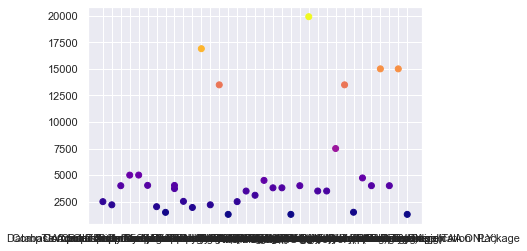

In [34]:
# Scatter Plot showing the total couse of each course
plt.scatter(nyc_subset2['course name'], nyc_subset2['Cost Total'], c=nyc_subset2['Cost Total'], cmap = plt.cm.plasma)

plt.show()

<AxesSubplot:>

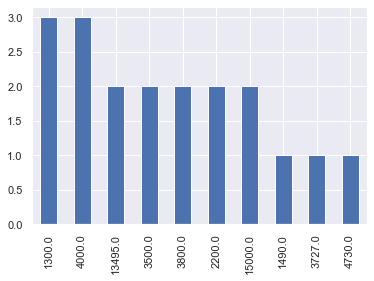

In [35]:
# Create bar chart to visualize top 10 values of "Cost Total"
it_top10 = (nyc_subset2['Cost Total']).value_counts().iloc[:10]
it_top10.plot(kind='bar')

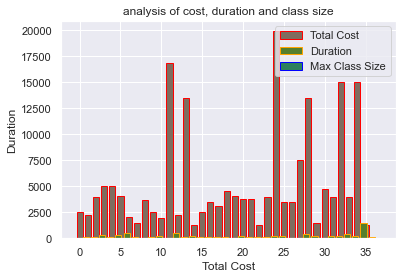

In [36]:
#Analysis of cost, duration, and class size
barWidth = 0.75

r1 = np.arange(len(nyc_subset2['course name']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, nyc_subset2['Cost Total'], color='#7f6d5f', width=barWidth, edgecolor='red', label='Total Cost')
plt.bar(r2, nyc_subset2['Duration'], color='#557f2d', width=barWidth, edgecolor='orange', label='Duration')
plt.bar(r3, nyc_subset2['Max Class Size'], color='#2d7f5e', width=barWidth, edgecolor='blue', label='Max Class Size')
figsize=(40, 40)

plt.xlabel('Total Cost')
plt.ylabel('Duration')
plt.title('analysis of cost, duration and class size')
plt.legend()
plt.show()

# **Conclussion.**

#### *****I was able to succesfully obtain the data from the NYC open data website for analysis, to answer my research question. After I obtained the data from the web page, I had to use all the tools learned in this course to tidying the data, manipulate missing values, structuring the data to create new columns and subset the data on it to succesfully fulfill the requirements of this project.*****
#### *****After I finished with the data wrangling, I use EDA to obtain values from columns, as well as the use of data graph and visualization to obtained all the results of this project.*****

